# Credit Risk: Data Wrangling & Exploratory Data Analysis (EDA)

![risk_modeling](https://user-images.githubusercontent.com/67468718/149666189-fbae54b6-b123-4905-8348-e59ec94cdb1c.png)

## Introduction:

If you've ever applied for a credit card or loan, you know that financial firms process your information before making a decision. This is because giving you a loan can have a serious financial impact on their business. But how do they make a decision? In this porject+, we will wrangle and prepare credit application data. After that, we will apply machine learning and business rules to reduce risk and ensure profitability. we will use two data sets that emulate real credit applications while focusing on business value.


**So, what exactly is credit risk?** 

* The possibility that someone who has borrowed money will not repay it all
* Calculated risk di(erence between lending someone money and a government bond
* When someone fails to repay a loan, it is said to be in default
* The likelihood that someone will default on a loan is the probability of default (PD)

**Expected loss**

* The dollar amount the firm loses as a result of loan default
* Three primary components:
  * Probability of Default (PD): is the likelihood someone will default on a loan.
  * Exposure at Default (EAD): is the ratio of the exposure against any recovery from the loss.
  * Loss Given Default (LGD): is the ratio of the exposure against any recovery from the loss.


```
Formula for expected loss:

Expected loss = PD * EAD * LGD
```




## Dataset 

For modeling probability of default we generally have two primary types of data available:

* Application data: which is data that is directly tied to the loan application like loan grade. 
* Behavioral data: which describes the recipient of the loan, such as employment length.

The data we will use for our predictions of **probability of default** includes a mix. This is important because application data alone is not as good as application and behavioral data together. Included are two columns which emulate data that can be purchased from credit bureaus. Acquiring external data is a common practice in most organizations. These are the columns available in the data set. Some examples are: personal income, the loan amount's percentage of the person's income, and credit history length. Consider the percentage of income. This could affect loan status if the loan amount is more than their income, because they may not be able to afford payments.



## Import necessary Libararies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os 
plt.style.use('ggplot')

print('***Libraries are imported***')

***Libraries are imported***


In [3]:
df = pd.read_csv('cr_loan2.csv')

## Explore the credit data

let's begin by looking at the data set df. In this data set, loan_status shows whether the loan is currently in default with 1 being default and 0 being non-default.

we have more columns within the data, and many could have a relationship with the values in loan_status. we need to explore the data and these relationships more with further analysis to understand the impact of the data on credit loan defaults.

Checking the structure of the data as well as seeing a snapshot helps us better understand what's inside the set. Similarly, visualizations provide a high level view of the data in addition to important trends and patterns.

In [4]:
# Check the structure of the data
# Check the first five rows of the data
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
df.shape

(32581, 12)

In [6]:
# Alright, let's have a look at our unique values, data types, missing values per variables:
summary = pd.concat([df.nunique(), df.dtypes, df.isnull().sum(), 100*df.isnull().mean()], axis=1)
summary.columns =['unique_count', 'dtypes', 'na_count', 'na_%']
summary.sort_values(by='unique_count', ascending=False)

,unique_count,dtypes,na_count,na_%
person_income,4295,int64,0,0.000000
loan_amnt,753,int64,0,0.000000
loan_int_rate,348,float64,3116,9.563856
loan_percent_income,77,float64,0,0.000000
person_age,58,int64,0,0.000000
person_emp_length,36,float64,895,2.747000
cb_person_cred_hist_length,29,int64,0,0.000000
loan_grade,7,object,0,0.000000
loan_intent,6,object,0,0.000000
person_home_ownership,4,object,0,0.000000


Ok, looks like we have missing data, let' keep this one in our mind after dealing with Outliers!

In [7]:
pd.set_option('float_format', '{:.0f}'.format)
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581,32581,31686,32581,29465,32581,32581,32581
mean,28,66075,5,9589,11,0,0,6
std,6,61983,4,6322,3,0,0,4
min,20,4000,0,500,5,0,0,2
25%,23,38500,2,5000,8,0,0,3
50%,26,55000,4,8000,11,0,0,4
75%,30,79200,7,12200,13,0,0,8
max,144,6000000,123,35000,23,1,1,30


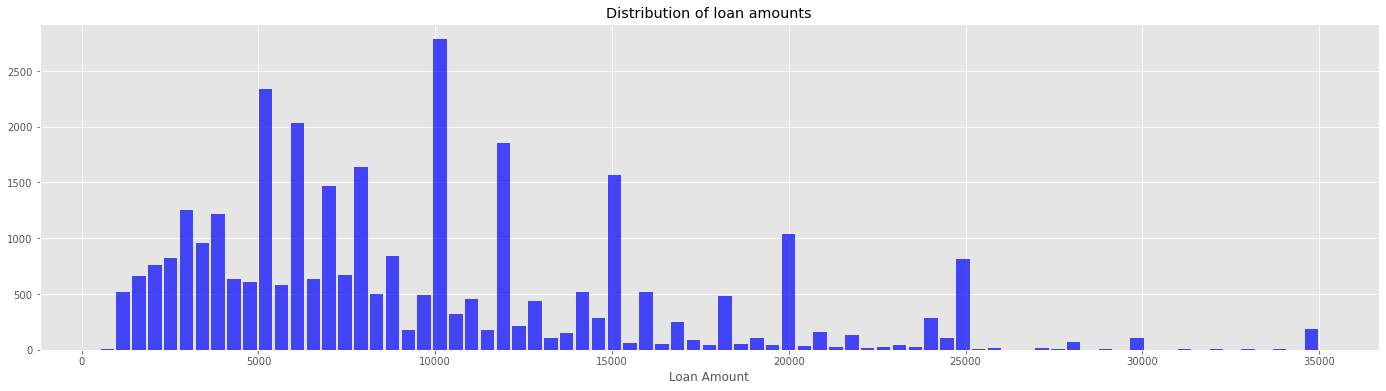

In [8]:
# Look at the distribution of loan amounts with a histogram
f, ax = plt.subplots(figsize = (24,6))
n, bins, patches = plt.hist(x=df['loan_amnt'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.xlabel("Loan Amount")
plt.title("Distribution of loan amounts")
plt.show()

There are 32 000 rows of data so the scatter plot may take a little while to plot.


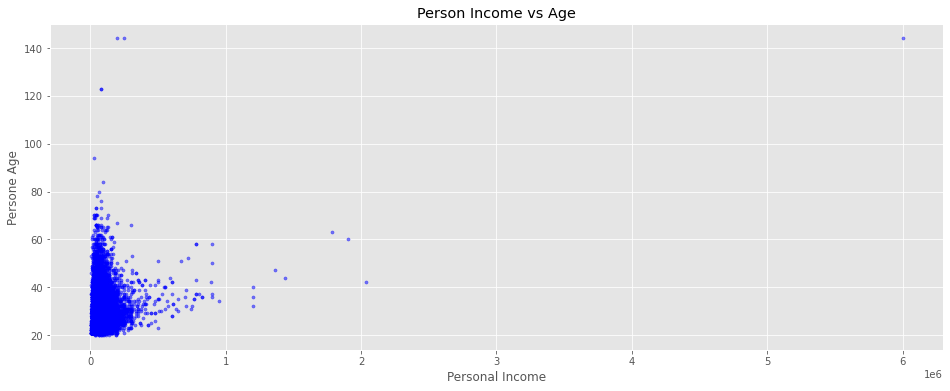

In [9]:
print("There are 32 000 rows of data so the scatter plot may take a little while to plot.")

# Plot a scatter plot of income against age
f, ax = plt.subplots(figsize = (16,6))
plt.scatter(df['person_income'], df['person_age'],c='blue', alpha=0.5, s=10)
plt.xlabel('Personal Income')
plt.ylabel('Persone Age')
plt.title('Person Income vs Age')
plt.show()

**As we can see above, there's a positive correlation with age and income, which could mean these older recipients are further along in their career and therefore earn higher salaries. There also appears to be an outlier in the data.**

## Data Transformating using Crosstab and pivot tables

Often, financial data is viewed as a pivot table in spreadsheets like Excel.

With cross tables, we get a high level view of selected columns and even aggregation like a count or average. For most credit risk models, especially for probability of default, columns like person_emp_length and person_home_ownership are common to begin investigating.

Now, let's explore how the values are populated throughout the data, and visualize them. For example, let's check how loan_status is affected by factors like home ownership status, loan grade, and loan percentage of income.


In [10]:
# Create a cross table of the loan intent and loan status
loan_intent_status = pd.DataFrame(pd.crosstab(df['loan_intent'], df['loan_status'], margins = True))
loan_intent_status

loan_status,0,1,All
loan_intent,,,
DEBTCONSOLIDATION,3722,1490,5212
EDUCATION,5342,1111,6453
HOMEIMPROVEMENT,2664,941,3605
MEDICAL,4450,1621,6071
PERSONAL,4423,1098,5521
VENTURE,4872,847,5719
All,25473,7108,32581


In [11]:
# Create a cross table of home ownership, loan status, and grade
ownership_L_status_grade = pd.DataFrame(pd.crosstab(df['person_home_ownership'],[df['loan_status'],df['loan_grade']]))
ownership_L_status_grade

loan_status               0                                 1             \
loan_grade                A     B     C    D    E   F  G    A     B    C   
person_home_ownership                                                      
MORTGAGE               5219  3729  1934  658  178  36  0  239   324  321   
OTHER                    23    29    11    9    2   0  0    3     5    6   
OWN                     860   770   464  264   26   7  0   66    34   31   
RENT                   3602  4222  2710  554  137  28  1  765  1338  981   

loan_status                               
loan_grade                D    E   F   G  
person_home_ownership                     
MORTGAGE                553  161  61  31  
OTHER                    11    6   2   0  
OWN                      18   31   8   5  
RENT                   1559  423  99  27

In [15]:
# Create a cross table of home ownership, loan status, and average percent income
ownership_L_status_perc = pd.DataFrame(pd.crosstab(df['person_home_ownership'], df['loan_status'],
                                        values=df['loan_percent_income'], aggfunc='mean'))
pd.set_option('float_format', '{:.4f}'.format)
ownership_L_status_perc

loan_status,0,1
person_home_ownership,,
MORTGAGE,0.1465,0.1849
OTHER,0.1438,0.3000
OWN,0.1800,0.2974
RENT,0.1446,0.2649


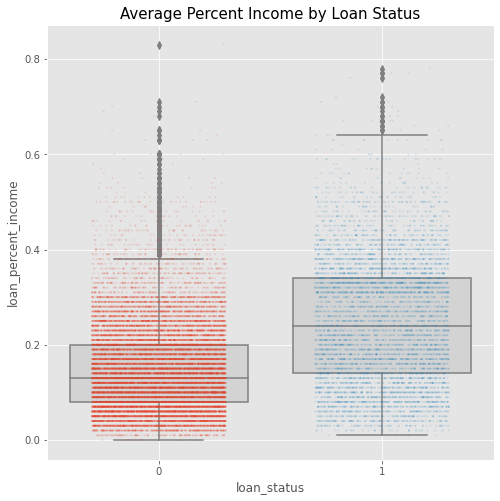

In [16]:
# Create a box plot of percentage income by loan status:
plt.figure(figsize=(8,8))
ax = sns.boxplot(y='loan_percent_income', x='loan_status', data=df, color="lightgrey")
sns.stripplot(y='loan_percent_income', x='loan_status', data=df, jitter=0.3, size=2, alpha=0.15)
ax.set_title('Average Percent Income by Loan Status', fontsize=15);
plt.grid(True)

**It looks like the average percentage of income for defaults is higher. This could indicate those recipients have a debt-to-income ratio that's already too high.**

## Outliers in Credit Data

Outliers are data points that exist far away from the majority of your data. This can happen due to several reasons, such as incorrect data recording to genuine rare occurrences. Either way you will often want to remove these values as they can negatively impact your models. An example of the negative effect can be seen here where an outlier is causing almost all of the scaled data to be squashed to the lower bound.+

**There are two methods we'll explore in this project:**

* Standard deviation based detection
* IQR - Quantile based detection



In [17]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0000,PERSONAL,D,35000,16.0200,1,0.5900,Y,3
1,21,9600,OWN,5.0000,EDUCATION,B,1000,11.1400,0,0.1000,N,2
2,25,9600,MORTGAGE,1.0000,MEDICAL,C,5500,12.8700,1,0.5700,N,3
3,23,65500,RENT,4.0000,MEDICAL,C,35000,15.2300,1,0.5300,N,2
4,24,54400,RENT,8.0000,MEDICAL,C,35000,14.2700,1,0.5500,Y,4


<ipython-input-18-baba3df0e85b>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)


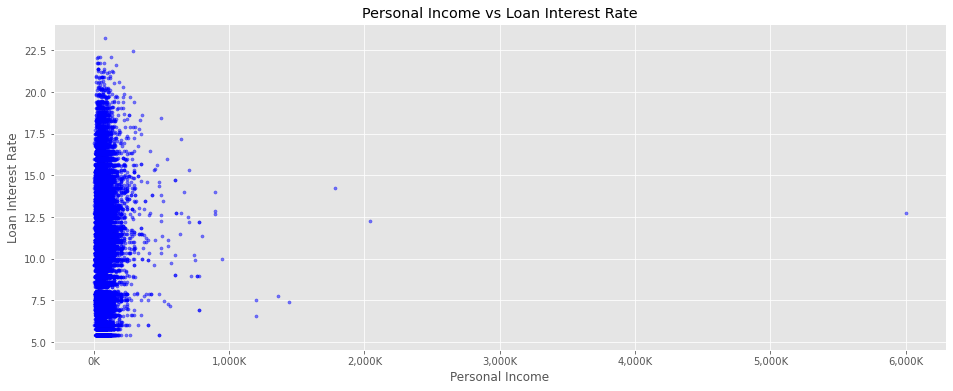

In [18]:
# Plot a scatter plot of income Loan interest Rate
f, ax = plt.subplots(figsize = (16,6))
plt.scatter(df['person_income'], df['loan_int_rate'],c='blue', alpha=0.5, s=10)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)
plt.xlabel('Personal Income')
plt.ylabel('Loan Interest Rate')
plt.title('Personal Income vs Loan Interest Rate')
plt.show()

<ipython-input-19-6203b2da6918>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)


[Text(-1000000.0, 0, '-1,000K'),
 Text(0.0, 0, '0K'),
 Text(1000000.0, 0, '1,000K'),
 Text(2000000.0, 0, '2,000K'),
 Text(3000000.0, 0, '3,000K'),
 Text(4000000.0, 0, '4,000K'),
 Text(5000000.0, 0, '5,000K'),
 Text(6000000.0, 0, '6,000K'),
 Text(7000000.0, 0, '7,000K')]

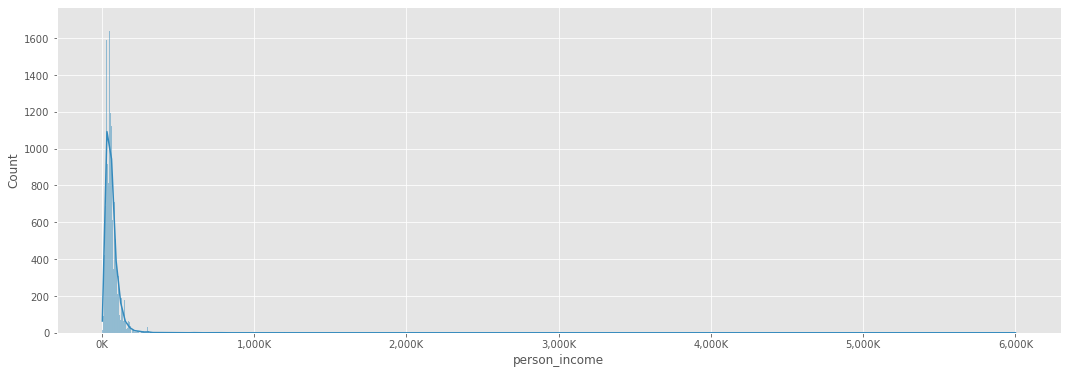

In [19]:
f, ax = plt.subplots(figsize = (18,6))
ax = sns.histplot(x=df['person_income'], kde=True)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)

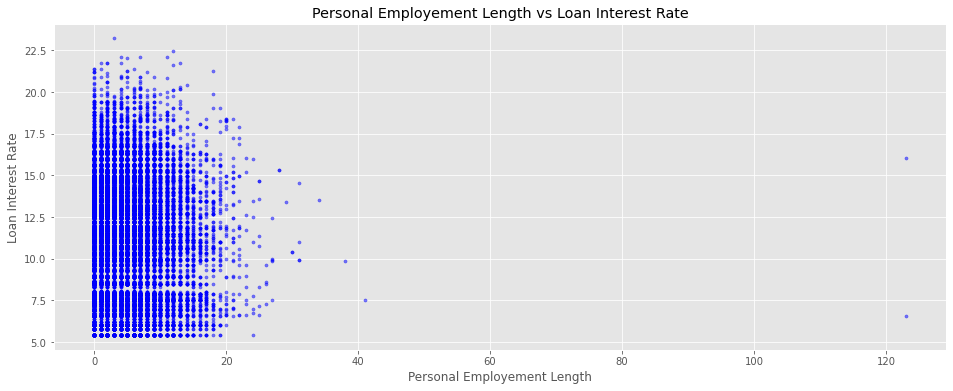

In [20]:
# Plot a scatter plot of Personal Employement Length against Loan Interest Rate:
f, ax = plt.subplots(figsize = (16,6))
plt.scatter(df['person_emp_length'], df['loan_int_rate'],c='blue', alpha=0.5, s=10)
plt.xlabel('Personal Employement Length')
plt.ylabel('Loan Interest Rate')
plt.title('Personal Employement Length vs Loan Interest Rate')
plt.show()

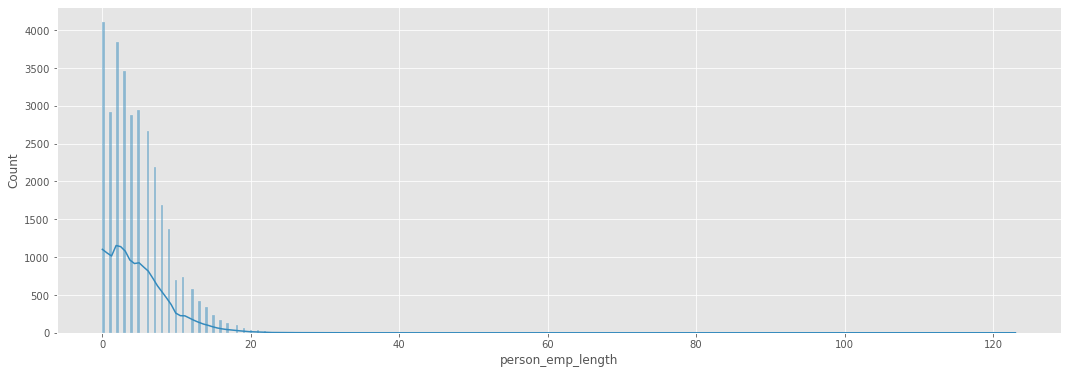

In [21]:
f, ax = plt.subplots(figsize = (18,6))
ax = sns.histplot(x=df['person_emp_length'], kde=True)


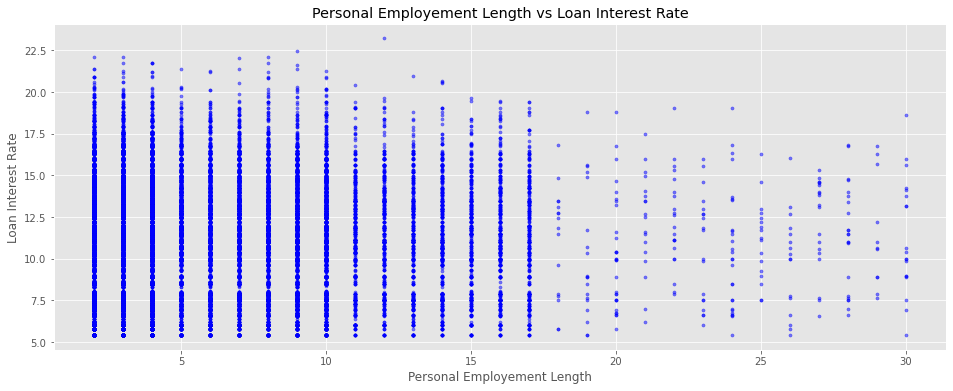

In [22]:
# Plot a scatter plot of Personal Employement Length against Loan Interest Rate:
f, ax = plt.subplots(figsize = (16,6))
plt.scatter(df['cb_person_cred_hist_length'], df['loan_int_rate'],c='blue', alpha=0.5, s=10)
plt.xlabel('Personal Employement Length')
plt.ylabel('Loan Interest Rate')
plt.title('Personal Employement Length vs Loan Interest Rate')
plt.show()

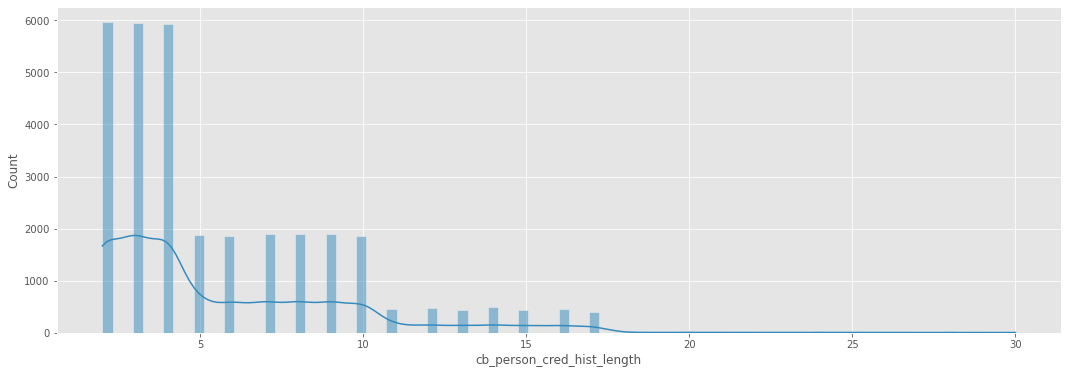

In [23]:
f, ax = plt.subplots(figsize = (18,6))
ax = sns.histplot(x=df['cb_person_cred_hist_length'], kde=True)

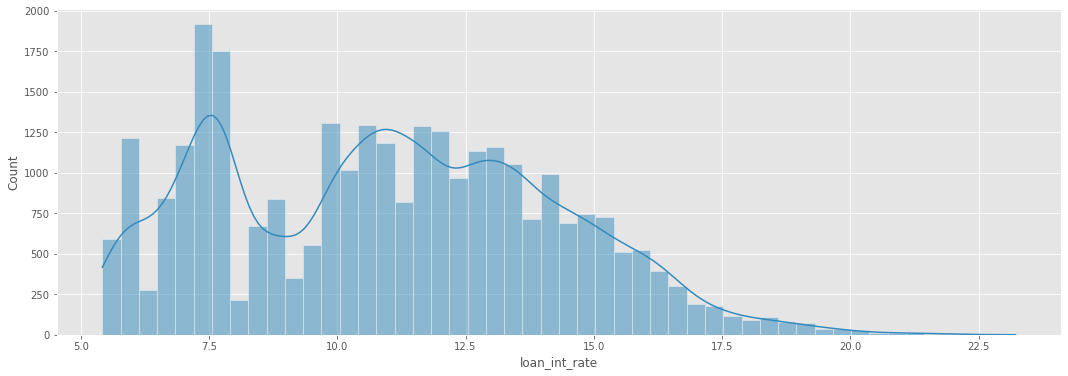

In [24]:
f, ax = plt.subplots(figsize = (18,6))
ax = sns.histplot(x=df['loan_int_rate'], kde=True)

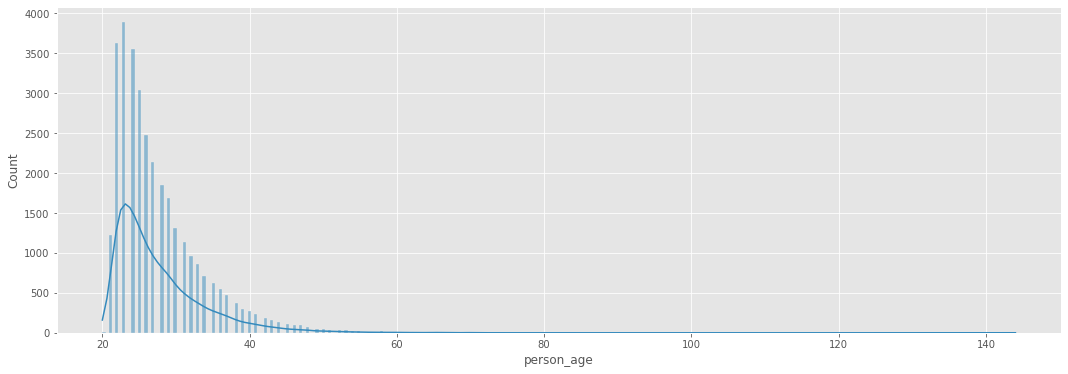

In [25]:
f, ax = plt.subplots(figsize = (18,6))
ax = sns.histplot(x=df['person_age'], kde=True)

In [26]:
def determine_outlier_thresholds_std(dataframe, col_name):
    upper_boundary = dataframe[col_name].mean() + 3 * dataframe[col_name].std()
    lower_boundary = dataframe[col_name].mean() - 3 * dataframe[col_name].std()
    return lower_boundary, upper_boundary

In [27]:
std_outlier = pd.DataFrame(determine_outlier_thresholds_std(df, df.columns))
std_outlier.T

,0,1
person_age,8.6904,46.7788
person_income,-119874.5090,252024.2060
person_emp_length,-7.6382,17.2176
loan_amnt,-9376.8888,28555.6310
loan_int_rate,1.2903,20.7331
loan_status,-1.0209,1.4572
loan_percent_income,-0.1501,0.4905
cb_person_cred_hist_length,-6.3608,17.9692


In [28]:
df_std = df

In [29]:
df_std = df_std[(df_std['person_age'] < 47) & (df['person_age'] > 8)]

In [30]:
df_std = df_std[df_std['person_income'] < 252024]

In [31]:
df_std = df_std[df_std['person_emp_length'] < 18]

In [32]:
df_std = df_std[df_std['loan_amnt'] < 28556]

In [33]:
df_std = df_std[df_std['loan_int_rate'] < 21]

In [34]:
df_std = df_std[df_std['cb_person_cred_hist_length'] < 18]

In [35]:
pd.set_option('float_format', '{:.0f}'.format)
df_std.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,27435,27435,27435,27435,27435,27435,27435,27435
mean,27,63029,5,9353,11,0,0,5
std,5,34949,4,5846,3,0,0,4
min,20,4000,0,500,5,0,0,2
25%,23,39000,2,5000,8,0,0,3
50%,26,55000,4,8000,11,0,0,4
75%,30,78000,7,12000,13,0,0,8
max,46,250000,17,28250,21,1,1,17


In [36]:
def determine_outlier_thresholds_quant(dataframe, col_name, th1=0.25, th3=0.75):
    quartile1 = dataframe[col_name].quantile(th1)
    quartile3 = dataframe[col_name].quantile(th3)
    iqr = quartile3 - quartile1
    upper_limit = quartile3 + 1.5 * iqr
    lower_limit = quartile1 - 1.5 * iqr
    return lower_limit, upper_limit

In [38]:
quant_outlier = pd.DataFrame(determine_outlier_thresholds_quant(df, df.columns))
pd.set_option('float_format', '{:.4f}'.format)
quant_outlier.T

,0,1
person_age,12.5000,40.5000
person_income,-22550.0000,140250.0000
person_emp_length,-5.5000,14.5000
loan_amnt,-5800.0000,23000.0000
loan_int_rate,-0.4550,21.8250
loan_status,0.0000,0.0000
loan_percent_income,-0.1200,0.4400
cb_person_cred_hist_length,-4.5000,15.5000


In [39]:
df_quant = df

In [40]:
df_quant = df_quant[(df_quant['person_age'] < 41) & (df['person_age'] > 11)]

In [41]:
df_quant = df_quant[df_quant['person_income'] < 140250]

In [42]:
df_quant = df_quant[df_quant['person_emp_length'] < 15]

In [43]:
df_quant = df_quant[df_quant['loan_amnt'] < 230000]

In [44]:
df_quant = df_quant[df_quant['loan_int_rate'] < 22]

In [45]:
df_quant = df_quant[df_quant['cb_person_cred_hist_length'] < 16]

In [46]:
pd.set_option('float_format', '{:.0f}'.format)
df_quant.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,25183,25183,25183,25183,25183,25183,25183,25183
mean,26,58783,4,9314,11,0,0,5
std,4,27278,3,6020,3,0,0,3
min,20,4080,0,500,5,0,0,2
25%,23,38000,2,5000,8,0,0,3
50%,25,54000,4,8000,11,0,0,4
75%,29,75000,7,12000,13,0,0,7
max,40,140004,14,35000,22,1,1,15


In [47]:
pd.set_option('float_format', '{:.0f}'.format)
df_std.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,27435,27435,27435,27435,27435,27435,27435,27435
mean,27,63029,5,9353,11,0,0,5
std,5,34949,4,5846,3,0,0,4
min,20,4000,0,500,5,0,0,2
25%,23,39000,2,5000,8,0,0,3
50%,26,55000,4,8000,11,0,0,4
75%,30,78000,7,12000,13,0,0,8
max,46,250000,17,28250,21,1,1,17


In [48]:
pd.set_option('float_format', '{:.0f}'.format)
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581,32581,31686,32581,29465,32581,32581,32581
mean,28,66075,5,9589,11,0,0,6
std,6,61983,4,6322,3,0,0,4
min,20,4000,0,500,5,0,0,2
25%,23,38500,2,5000,8,0,0,3
50%,26,55000,4,8000,11,0,0,4
75%,30,79200,7,12200,13,0,0,8
max,144,6000000,123,35000,23,1,1,30


In [49]:
df.shape

(32581, 12)

In [50]:
df_std.shape

(27435, 12)

In [51]:
df_quant.shape

(25183, 12)

<ipython-input-52-6203b2da6918>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)


[Text(-1000000.0, 0, '-1,000K'),
 Text(0.0, 0, '0K'),
 Text(1000000.0, 0, '1,000K'),
 Text(2000000.0, 0, '2,000K'),
 Text(3000000.0, 0, '3,000K'),
 Text(4000000.0, 0, '4,000K'),
 Text(5000000.0, 0, '5,000K'),
 Text(6000000.0, 0, '6,000K'),
 Text(7000000.0, 0, '7,000K')]

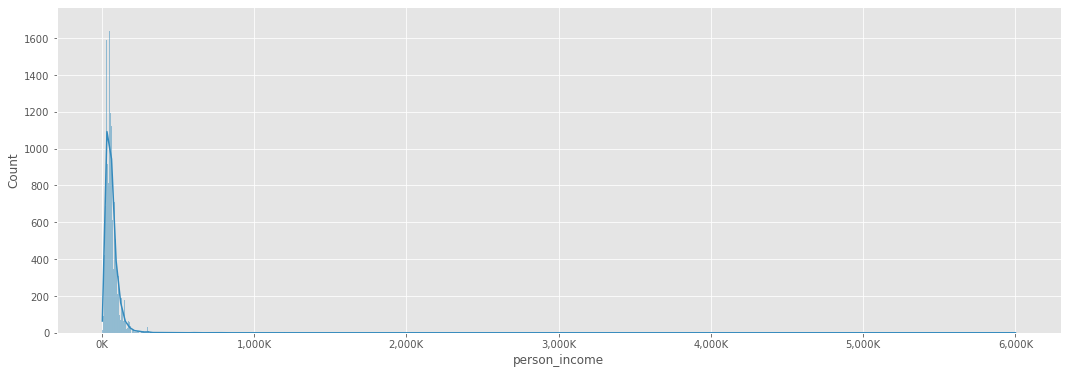

In [52]:
f, ax = plt.subplots(figsize = (18,6))
ax = sns.histplot(x=df['person_income'], kde=True)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)

<ipython-input-53-44f001260263>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)


[Text(-50000.0, 0, '-50K'),
 Text(0.0, 0, '0K'),
 Text(50000.0, 0, '50K'),
 Text(100000.0, 0, '100K'),
 Text(150000.0, 0, '150K'),
 Text(200000.0, 0, '200K'),
 Text(250000.0, 0, '250K'),
 Text(300000.0, 0, '300K')]

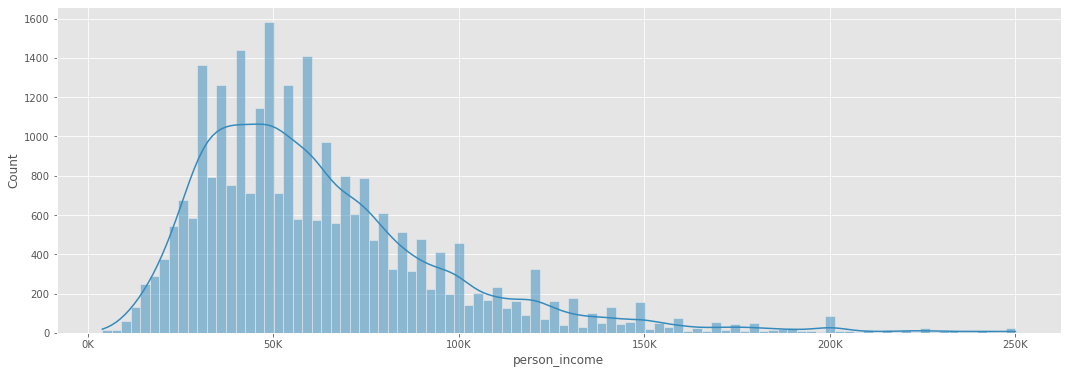

In [53]:
f, ax = plt.subplots(figsize = (18,6))
ax = sns.histplot(x=df_std['person_income'], kde=True)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)

<ipython-input-54-23725024503e>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)


[Text(-20000.0, 0, '-20K'),
 Text(0.0, 0, '0K'),
 Text(20000.0, 0, '20K'),
 Text(40000.0, 0, '40K'),
 Text(60000.0, 0, '60K'),
 Text(80000.0, 0, '80K'),
 Text(100000.0, 0, '100K'),
 Text(120000.0, 0, '120K'),
 Text(140000.0, 0, '140K'),
 Text(160000.0, 0, '160K')]

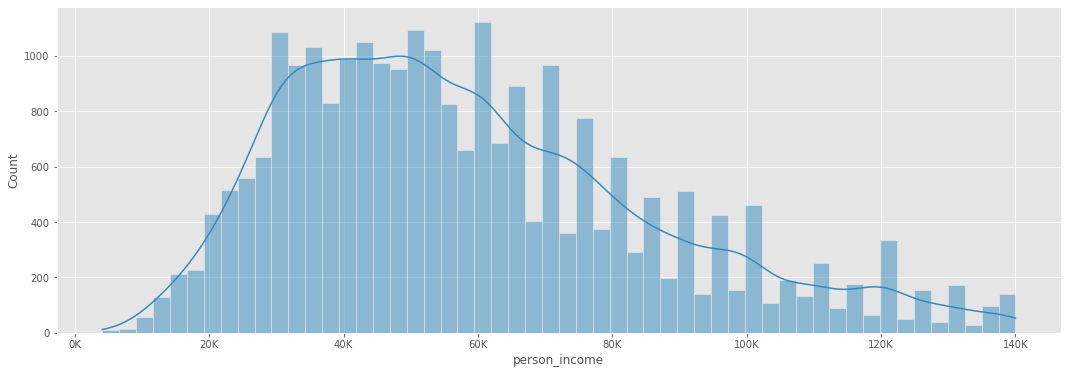

In [54]:
f, ax = plt.subplots(figsize = (18,6))
ax = sns.histplot(x=df_quant['person_income'], kde=True)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)

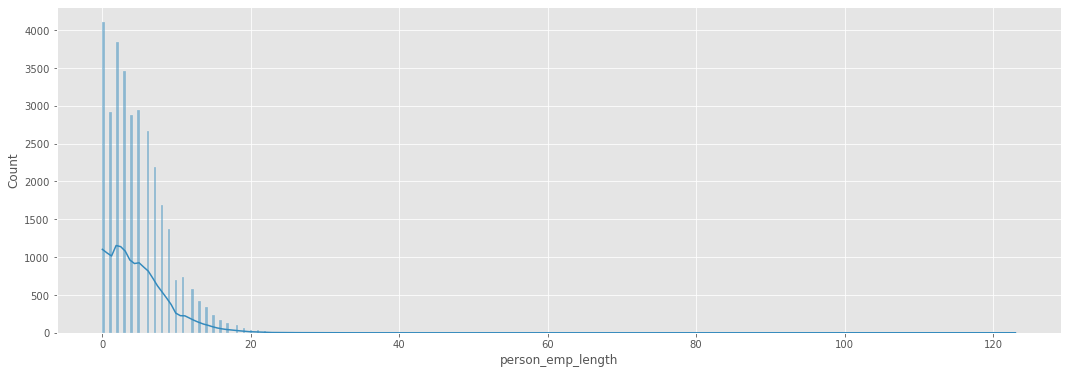

In [55]:
f, ax = plt.subplots(figsize = (18,6))
ax = sns.histplot(x=df['person_emp_length'], kde=True)

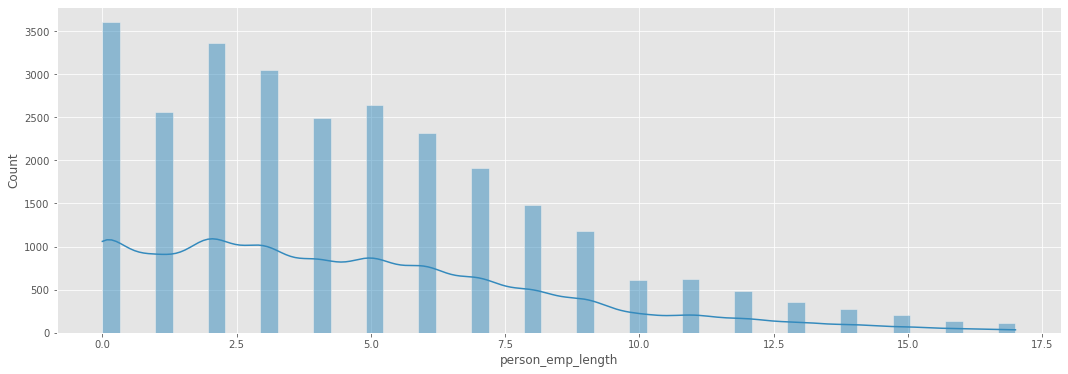

In [56]:
f, ax = plt.subplots(figsize = (18,6))
ax = sns.histplot(x=df_std['person_emp_length'], kde=True)

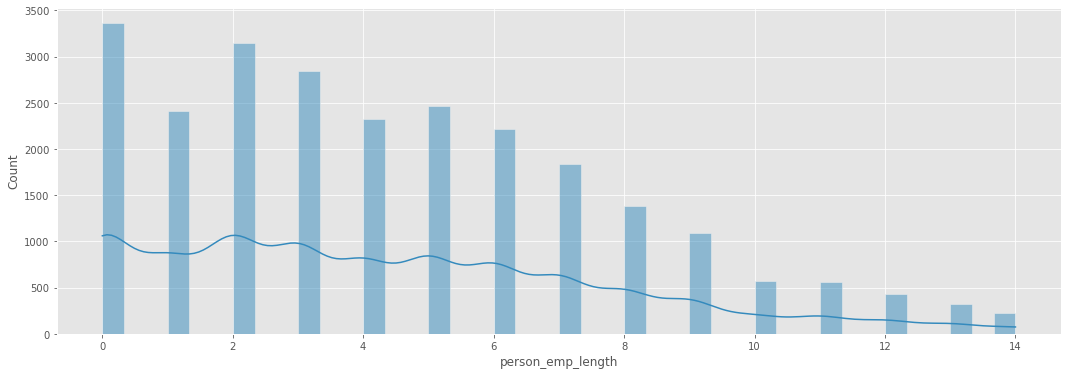

In [57]:
f, ax = plt.subplots(figsize = (18,6))
ax = sns.histplot(x=df_quant['person_emp_length'], kde=True)

Ideally, **IQR method** is best suited for datasets which are skewed (either left or right). and in our Credit Dataset weer can see that most of the features are extermely skewed to right, as shown above from the kernel Density Estimation plots). so we'll be choosing  **df_quant** Dataframe as our Final Dataframe for modeling!!

Please note that by going with **df_quant** Dataframe means we'll by dropping ~ 22.7% of the dataset and if we go with **df_std** Dataframe we'll by dropping ~ 16% of the original Dataset.

## Missing Data in Credit Data

First let's check if we still have any missing Data after we removed the outliers:

**Reminder of the original Dataset:**

In [58]:
# Alright, let's have a look at our unique values, data types, missing values per variables:
summary_org = pd.concat([df.nunique(), df.dtypes, df.isnull().sum(), 100*df.isnull().mean()], axis=1)
summary_org.columns =['unique_count', 'dtypes', 'na_count', 'na_%']
summary_org.sort_values(by='unique_count', ascending=False)

,unique_count,dtypes,na_count,na_%
person_income,4295,int64,0,0
loan_amnt,753,int64,0,0
loan_int_rate,348,float64,3116,10
loan_percent_income,77,float64,0,0
person_age,58,int64,0,0
person_emp_length,36,float64,895,3
cb_person_cred_hist_length,29,int64,0,0
loan_grade,7,object,0,0
loan_intent,6,object,0,0
person_home_ownership,4,object,0,0


**New Dataset After removing the outliers:** Thats awesome, looks like, by removing the outliers we managed to get rid of the missing values as well!!!

In [59]:
# Alright, let's have a look at our unique values, data types, missing values per variables:
summary_quant = pd.concat([df_quant.nunique(), df_quant.dtypes, df_quant.isnull().sum(), 100*df_quant.isnull().mean()], axis=1)
summary_quant.columns =['unique_count', 'dtypes', 'na_count', 'na_%']
summary_quant.sort_values(by='unique_count', ascending=False)

,unique_count,dtypes,na_count,na_%
person_income,3283,int64,0,0
loan_amnt,702,int64,0,0
loan_int_rate,338,float64,0,0
loan_percent_income,76,float64,0,0
person_age,21,int64,0,0
person_emp_length,15,float64,0,0
cb_person_cred_hist_length,14,int64,0,0
loan_grade,7,object,0,0
loan_intent,6,object,0,0
person_home_ownership,4,object,0,0


In [60]:
df_quant.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

<ipython-input-61-157b6bae688c>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


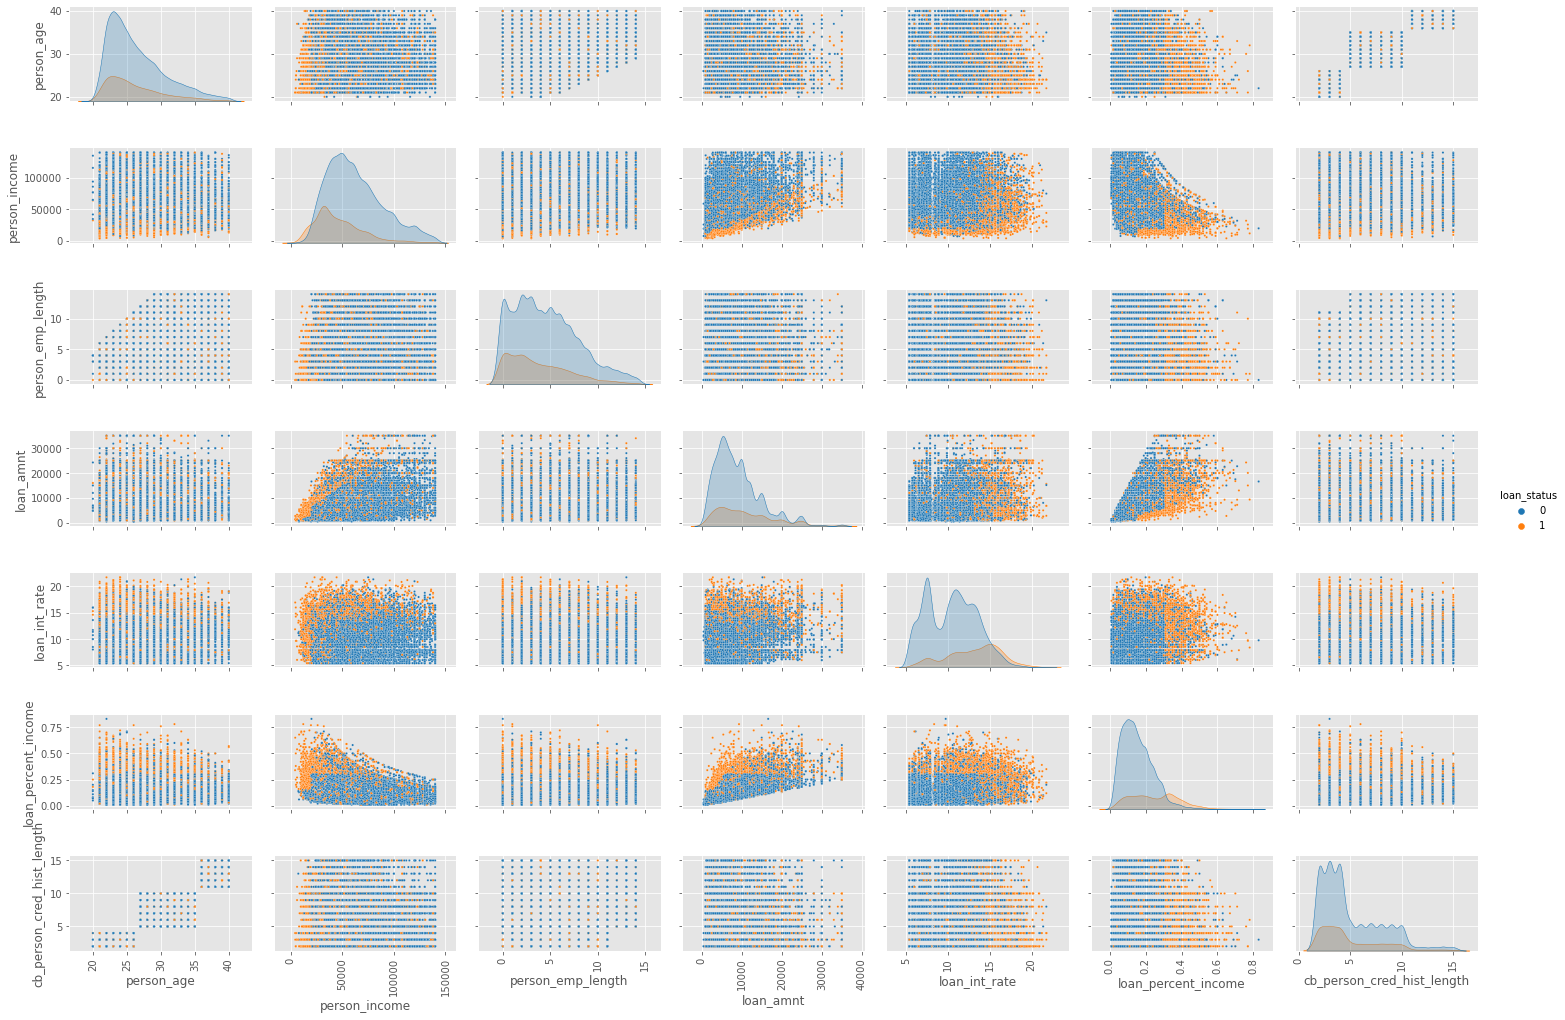

In [61]:
# Make a pairplot of the df data
# Due to the large features in the house df, let's add "aspect", "height" & "hspace" to control the size and spacing of the plots.
# let's improve the visibility by adding "palette" and a dictionary of keyword (plot_kws) to control the size:

g = sns.pairplot(df_quant[['person_age', 'person_income', 'person_home_ownership','person_emp_length', 'loan_intent', 
                           'loan_grade', 'loan_amnt','loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_default_on_file', 
                           'cb_person_cred_hist_length']], hue='loan_status', 
                            height=2, aspect=1.5, palette="tab10", plot_kws = {"s":5})

plt.subplots_adjust(hspace=0.5)
g.fig.draw(g.fig.canvas.get_renderer())  # required, as matplotlib calculates ticks during draw time
for ax in g.axes.flat: 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

Text(0.5, 1.0, 'Credit Data Heatmap')

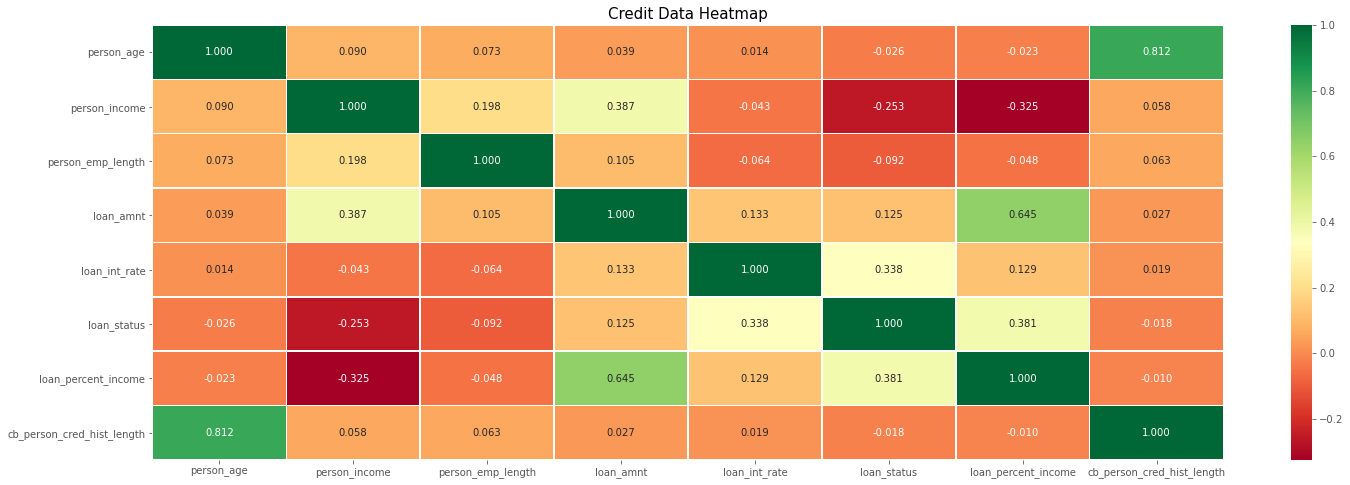

In [62]:
# Make a heatmap of the data 
plt.figure(figsize=(24,8)) # ensure that the Matplotlib plot is big enough
sns.heatmap(df_quant.corr(), linewidths=.4, annot=True, fmt=".3f", cmap='RdYlGn')
plt.title('Credit Data Heatmap', fontsize=15)

## Target Variable Visualization: Loan Status

The class labels for the target column (loan_status) in our data is imbalance as indicated in the bar chart below. Using this imbalance data to train our model will make it bias towards predicting the class with the majority labels. To prevent this, let's use a technique called SMOTE (Synthetic Minority Over-Sampling Technique). 

<AxesSubplot:ylabel='Frequency'>

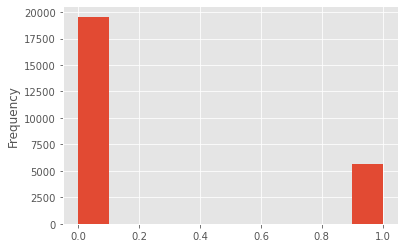

In [66]:
df_quant.loan_status.plot(kind='hist')

In [63]:
# Saving df_final_v1:
df_quant.to_csv(path_or_buf = "path" + "/credit_risk_quant.csv", index=False)

In [64]:
df_std.to_csv(path_or_buf = "path" + "/credit_risk_std.csv", index=False)

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

In [ ]:
#let's run below to allow printing the max columns and rows:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)